In [8]:
## Notebook demoing arrows on brain meshes

In [1]:
import os
from matplotlib_surface_plotting import plot_surf
import nibabel as nb
import numpy as np

In [2]:
parcellation = nb.load('../data/Glasser_2016.32k.L.label.gii').darrays[0].data
cortex_label=np.where(parcellation>0)[0]

In [3]:
#choose subset of arrows
selection = np.random.choice(cortex_label,500)


In [11]:
import matplotlib.cm as cm
cmap=cm.get_cmap('viridis')
arrow_colours=cmap(selection/np.max(selection))

In [13]:
#Load in inflated surface and vectors
overlay = nb.load('../data/v1_geodesic.func.gii').darrays[0].data
#load arrows indicating differential of geodesic distance
d = nb.load('../data/geodesic_distance_inflated_vectors.func.gii')
arrows = np.vstack([d.darrays[0].data,d.darrays[1].data,d.darrays[2].data,]).T
surf=nb.load('../data/fs_LR.32k.L.inflated.surf.gii')
vertices,faces = surf.darrays[0].data,surf.darrays[1].data


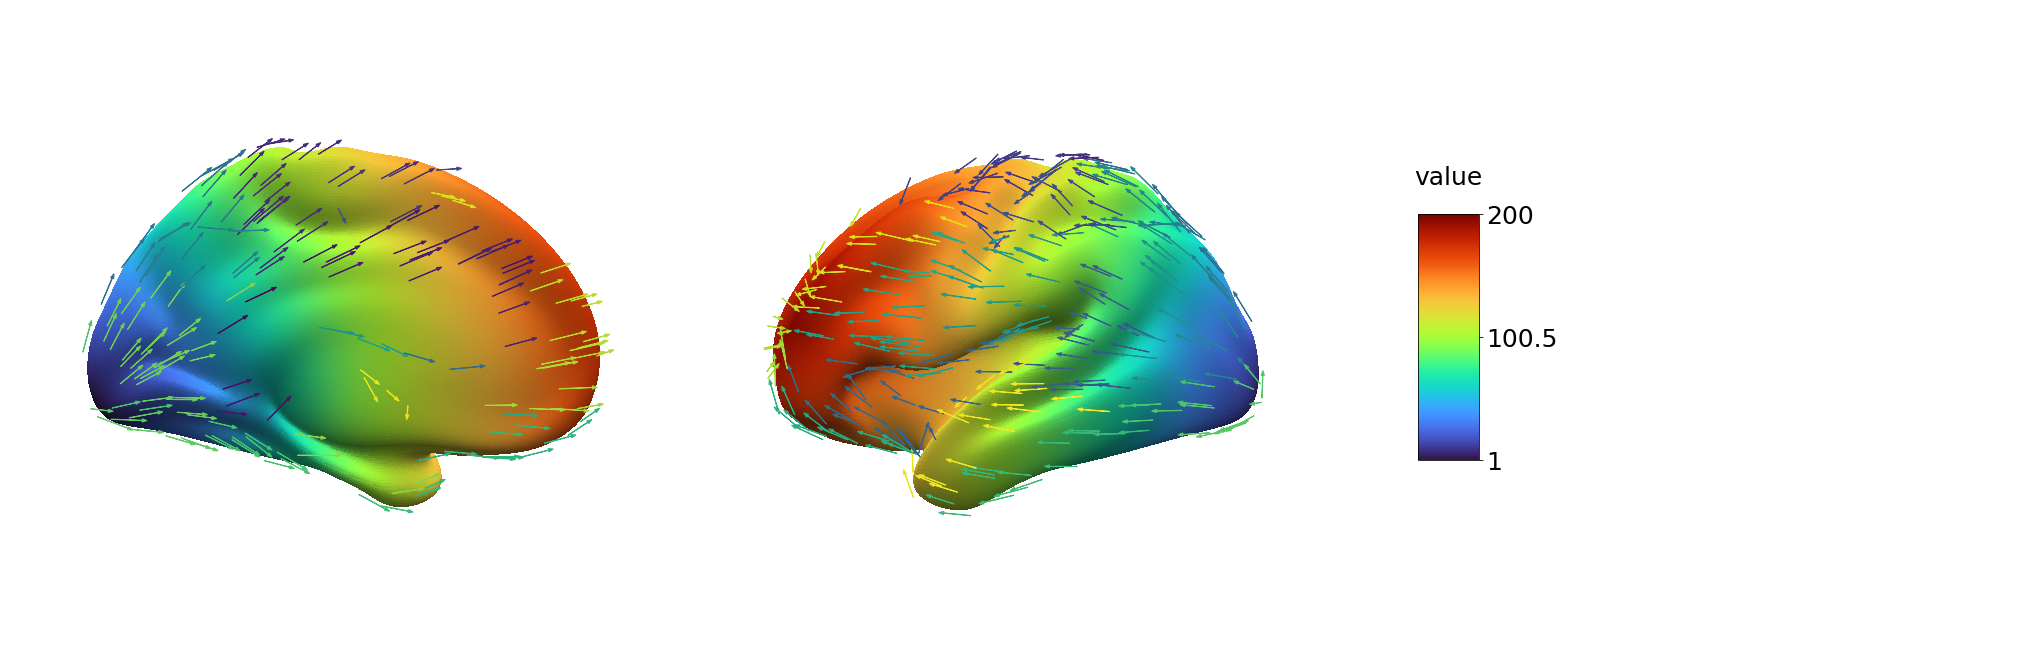

In [14]:
plot_surf(vertices,faces,overlay,flat_map=False,base_size=10,
         vmin=1,vmax=200, arrows=arrows, arrow_subset=selection,arrow_size=0.1,
          arrow_colours=arrow_colours,
         cmap='turbo')

In [6]:
#Load in flat surface and vectors
overlay = nb.load('../data/v1_geodesic.func.gii').darrays[0].data
#load arrows indicating differential of geodesic distance
d = nb.load('../data/geodesic_distance_flat_vectors.func.gii')
arrows = np.vstack([d.darrays[0].data,d.darrays[1].data,d.darrays[2].data,]).T
surf=nb.load('../data/fs_LR.32k.L.flat.surf.gii')
vertices,faces = surf.darrays[0].data,surf.darrays[1].data


/data1/testing_plotters/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:9: RuntimeWarning: invalid value encountered in true_divide
  arr[:,0] /= lens
/data1/testing_plotters/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:10: RuntimeWarning: invalid value encountered in true_divide
  arr[:,1] /= lens
/data1/testing_plotters/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:11: RuntimeWarning: invalid value encountered in true_divide
  arr[:,2] /= lens


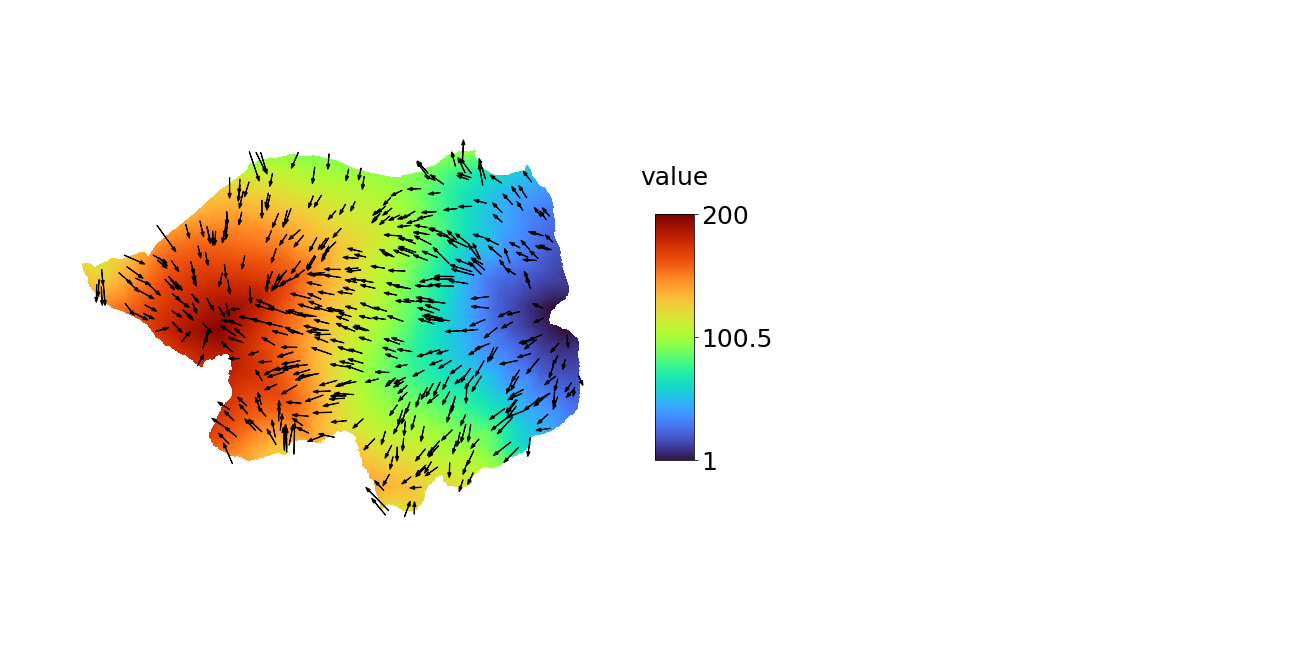

In [7]:
plot_surf(vertices,faces,overlay,flat_map=True,base_size=10,
         vmin=1,vmax=200, arrows=arrows, arrow_subset=selection,arrow_size=0.8,
         cmap='turbo')